# 1. 数据预处理（Pre-processing Data）
## 1.1 前期准备

In [3]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


## 1.2 数据获取与解析

In [5]:
data_cr = pd.read_csv('creditcard.csv')
data_cr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# The classes are heavily skewed:
print('No Frauds', round(data_cr['Class'].value_counts()[0]/len(data_cr) * 100,2), '% of the dataset')
print('Frauds', round(data_cr['Class'].value_counts()[1]/len(data_cr) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


从上面可以看出，数据为结构化数据，不需要抽特征转化，但特征Time和Amount的数据规格和其他特征不一样，需要对其做特征做特征缩放。

In [8]:
data_cr.shape  #查看数据集的大小

(284807, 31)

本数据集大小为28万行，31列。

In [10]:
data_cr.info() # 查看数据的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

通过查看数据信息得知，数据的类型基本是float64和int64数据类型。

In [12]:
data_cr.describe().T #查看数据基本统计信息

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


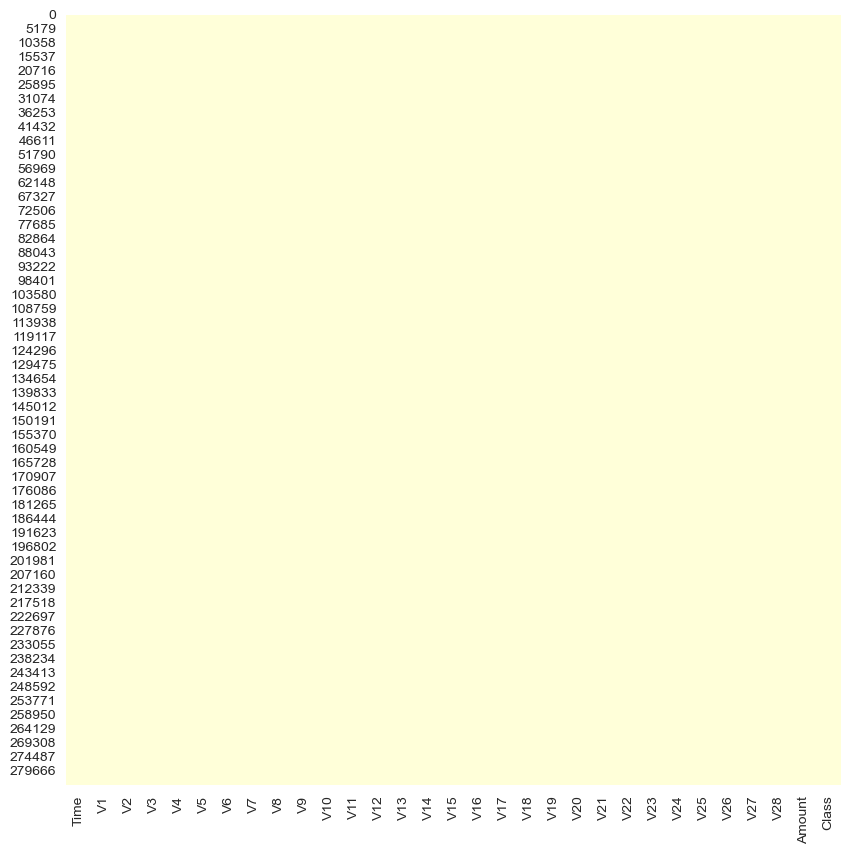

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data_cr.isnull(),cbar=False,cmap='YlGnBu')
plt.show() # 查看缺失值情况

通过上图可以获知，数据集不存在缺失值，因此不需作缺失值处理。

# 2. 特征工程（Feature Engineering）

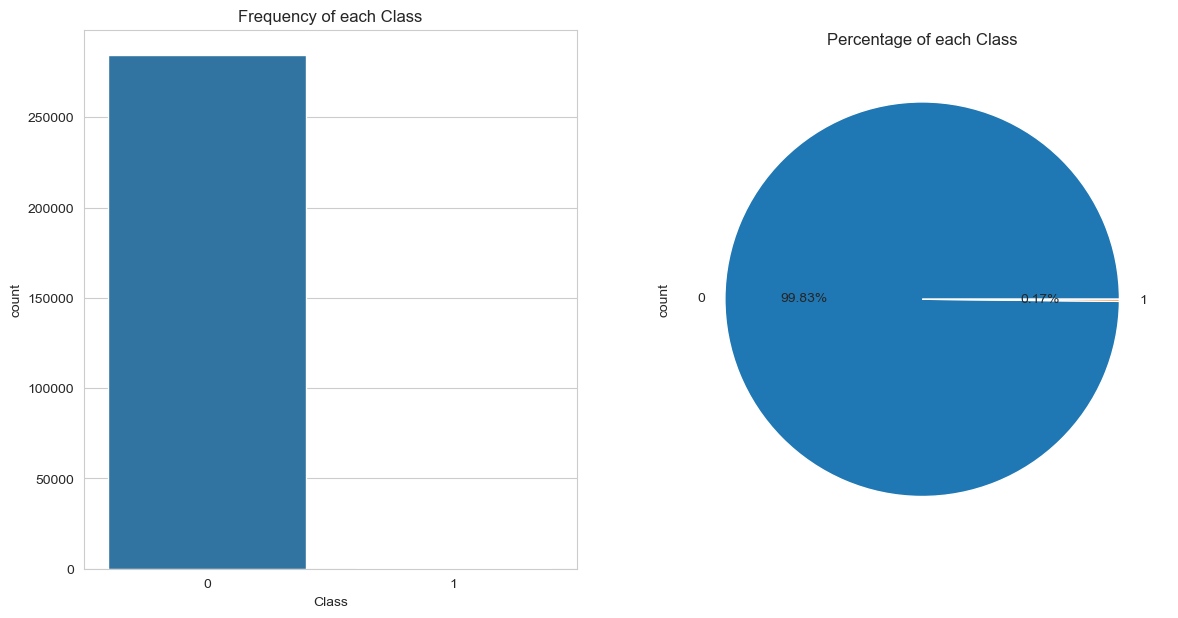

In [16]:
# 目标变量分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Class',data=data_cr,ax=axs[0])
axs[0].set_title("Frequency of each Class")
data_cr['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [17]:
# 查看目标列的情况
data_cr.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

数据集284,807笔交易中有492笔是信用卡被盗刷交易，信用卡被盗刷交易占总体比例为0.17%，信用卡交易正常和被盗刷两者数量不平衡，样本不平衡影响分类器的学习，稍后我们将会使用过采样的方法解决样本不平衡的问题。

## 2.1 特征衍生
特征Time的单为秒，我们将其转化为以小时为单位对应每天的时间。

In [20]:
data_cr['Hour'] =data_cr["Time"].apply(lambda x : divmod(x, 3600)[0]) #单位转换

## 2.2 特征选择（数据探索）
查看信用卡正常用户与被盗刷用户之间的区别。

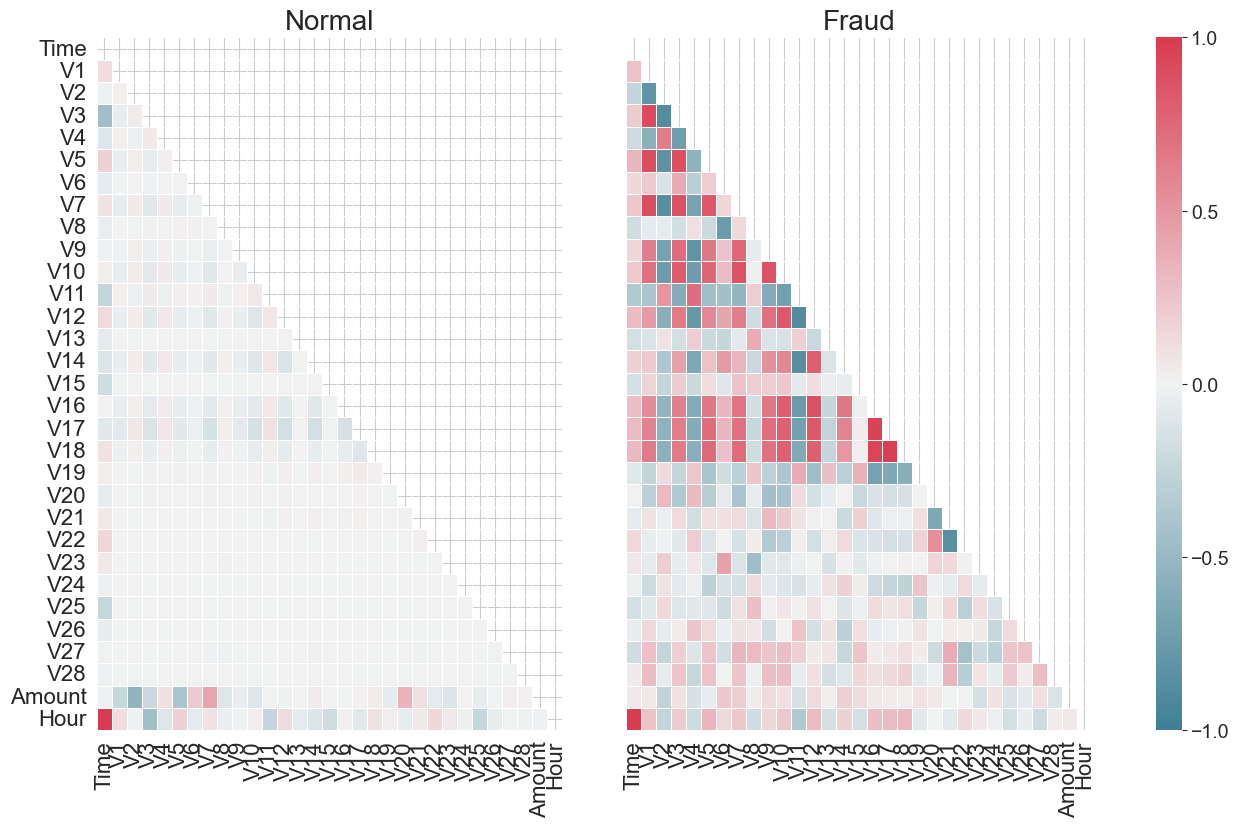

In [22]:
Xfraud = data_cr.loc[data_cr["Class"] == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = data_cr.loc[data_cr["Class"] == 0]
                  
correlationNonFraud = XnonFraud.loc[:, data_cr.columns != 'Class'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

correlationFraud = Xfraud.loc[:, data_cr.columns != 'Class'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraud', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

从上图可以看出，信用卡被盗刷的事件中，部分变量之间的相关性更明显。其中变量V1、V2、V3、V4、V5、V6、V7、V9、V10、V11、V12、V14、V16、V17和V18以及V19之间的变化在信用卡被盗刷的样本中呈性一定的规律。

## 2.3 盗刷交易、交易金额和交易次数的关系

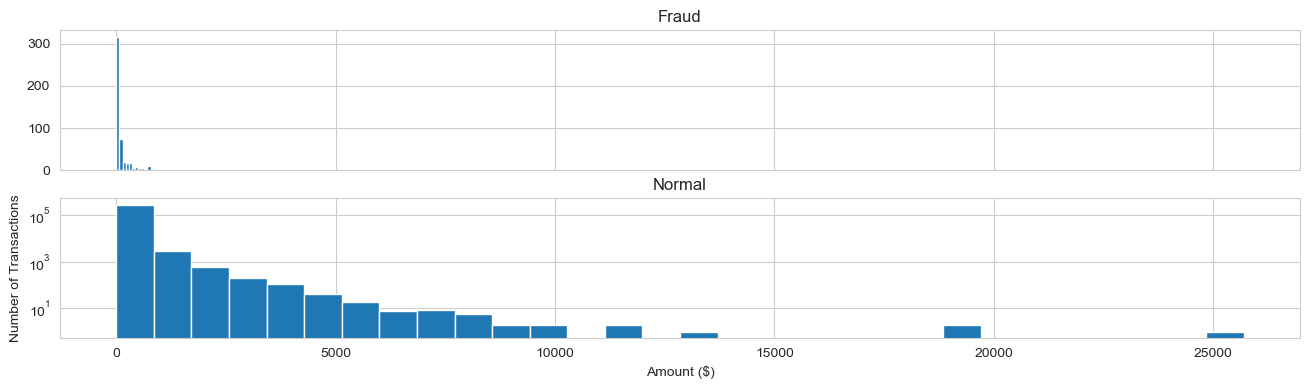

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(data_cr["Amount"][data_cr["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data_cr["Amount"][data_cr["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

信用卡被盗刷发生的金额与信用卡正常用户发生的金额相比呈现散而小的特点，这说明信用卡盗刷者为了不引起信用卡卡主的注意，更偏向选择小金额消费。

## 2.4 大家最喜欢消费的时间段

/var/folders/ym/c97bmtmn33ddxw9pbxyz635w0000gn/T/ipykernel_14836/873138221.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Hour", data=data_cr, kind="count", palette="ocean", height=6, aspect=3)


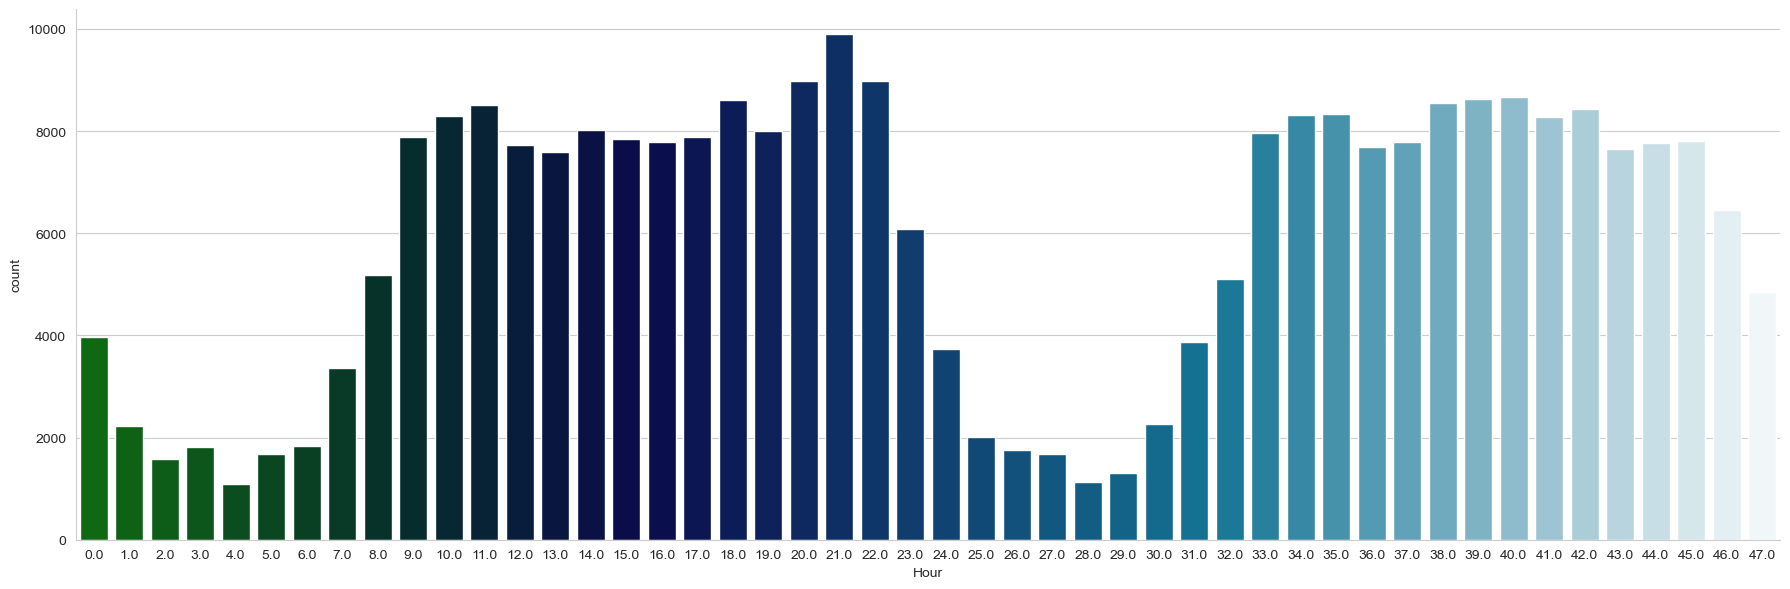

In [40]:
sns.catplot(x="Hour", data=data_cr, kind="count", palette="ocean", height=6, aspect=3)

/var/folders/ym/c97bmtmn33ddxw9pbxyz635w0000gn/T/ipykernel_14836/2699654273.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="Hour",data=data_cr,palette="husl",ax=ax1)


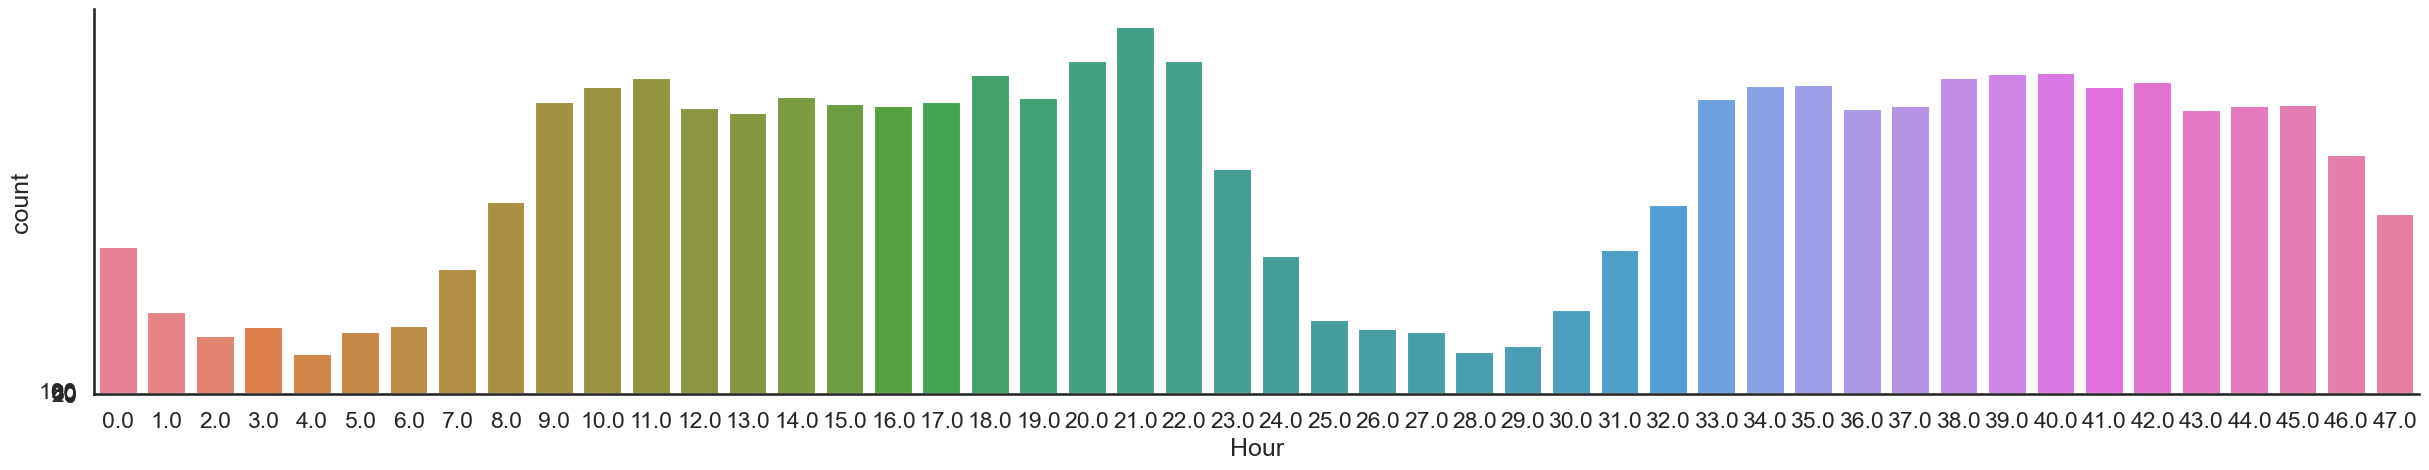

In [42]:
data_cr['Hour'] =data_cr["Time"].apply(lambda x : divmod(x, 3600)[0])
sns.set(style="white")
plt.rcParams["font.sans-serif"]=["Microsoft YaHei"]
sns.set(style="white",context="talk")
fig,ax1 = plt.subplots(1,1,figsize=(30,5),sharex=True)
group_values = data_cr.groupby("V1").count().reset_index()
g = sns.countplot(x="Hour",data=data_cr,palette="husl",ax=ax1)

g.set_yticks([0,20,40,60,80,100])
sns.despine(bottom=False,left=False) 

每天早上9点到晚上11点之间是信用卡消费的高频时间段。

## 2.5 盗刷交易、交易金额和交易时间的关系

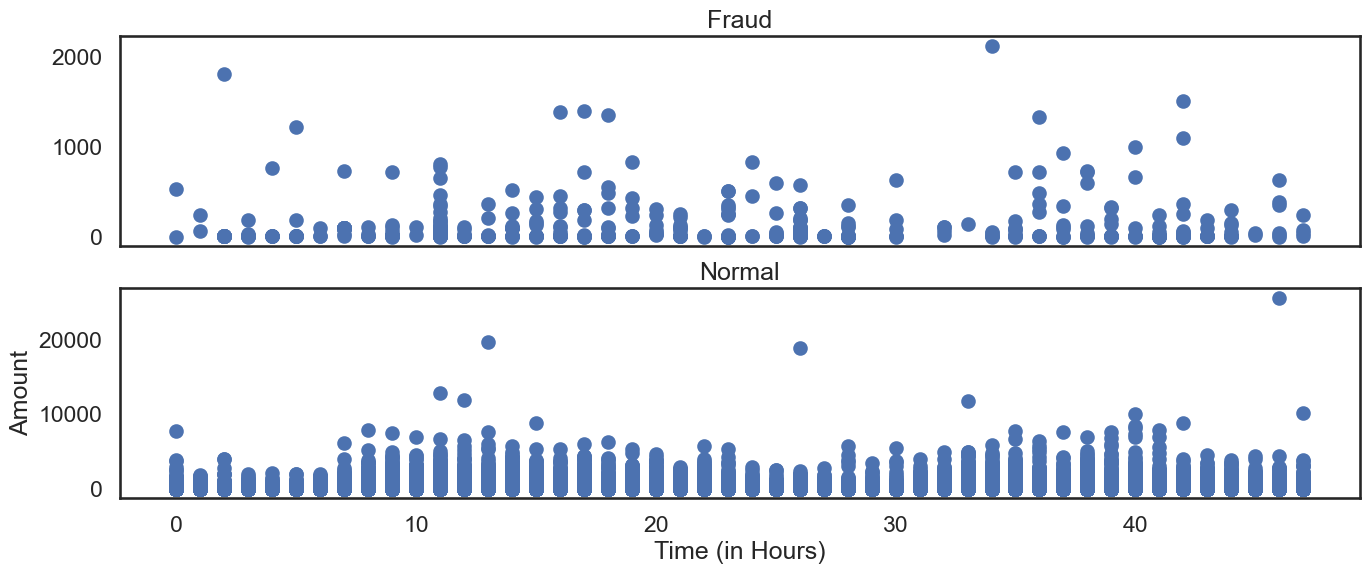

In [46]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(data_cr["Hour"][data_cr["Class"] == 1], data_cr["Amount"][data_cr["Class"]  == 1])
ax1.set_title('Fraud')

ax2.scatter(data_cr["Hour"][data_cr["Class"] == 0], data_cr["Amount"][data_cr["Class"] == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

In [48]:
print ("Fraud Stats Summary")
print (data_cr["Amount"][data_cr["Class"] == 1].describe())
print ()
print ("Normal Stats Summary")
print (data_cr["Amount"][data_cr["Class"]  == 0].describe())

Fraud Stats Summary
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Stats Summary
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


从上图可以看出，在信用卡被盗刷样本中，离群值发生在客户使用信用卡消费更低频的时间段。信用卡被盗刷数量案发最高峰在第一天上午11点达到43次，其余发生信用卡被盗刷案发时间在晚上时间11点至第二早上9点之间，说明信用卡盗刷者为了不引起信用卡卡主注意，更喜欢选择信用卡卡主睡觉时间和消费频率较高的时间点作案；同时，信用卡发生被盗刷的最大值也就只有2,125.87美元。

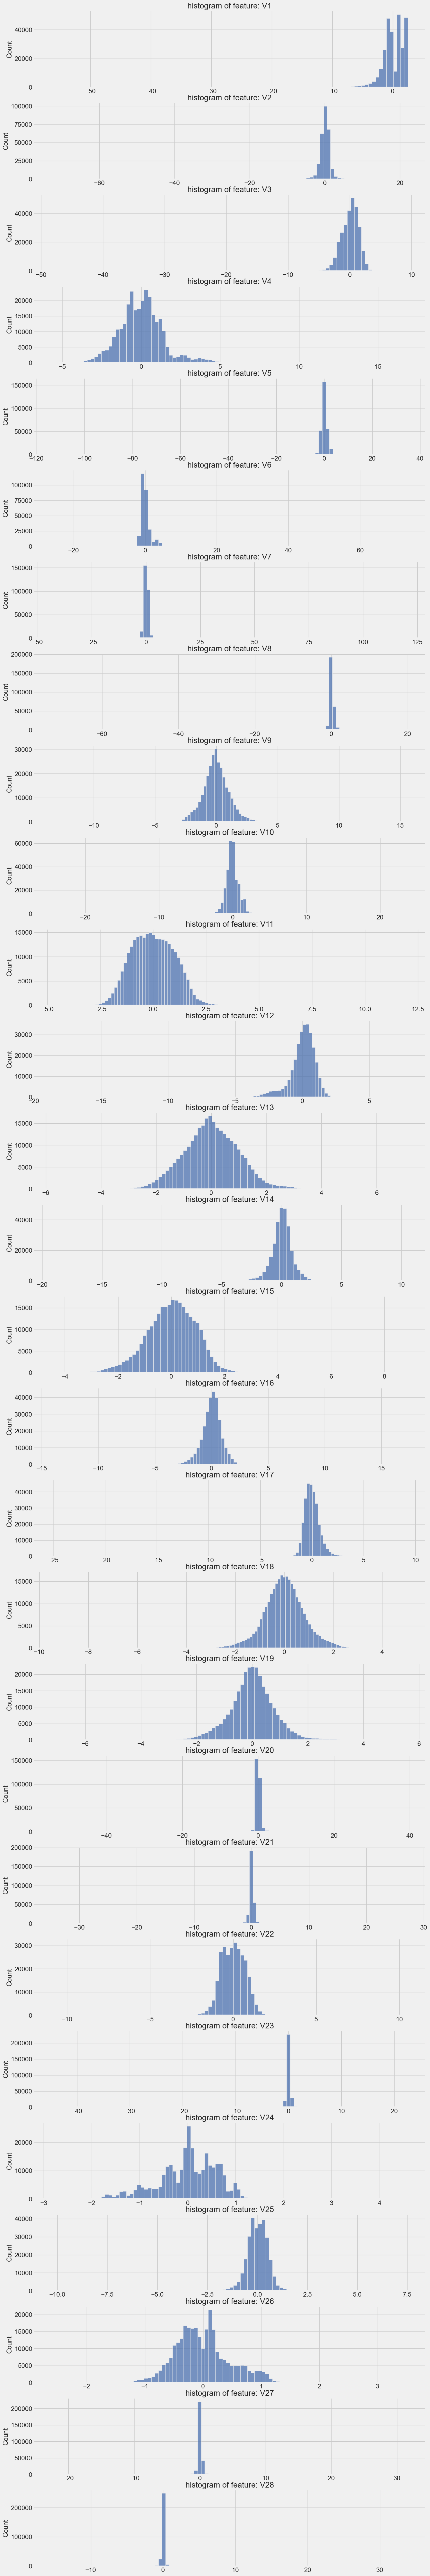

In [129]:
#Select only the anonymized features.
v_feat = data_cr.iloc[:,1:29].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_cr[v_feat]):
    ax = plt.subplot(gs[i])
    sns.histplot(data=data_cr[data_cr["Class"] == 1], x=cn, bins=50, kde=False, ax=ax, color='r', label='Class=1')
    sns.histplot(data=data_cr[data_cr["Class"] == 0], x=cn, bins=100, kde=False, ax=ax, color='b', label='Class=0')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

上图是不同变量在信用卡被盗刷和信用卡正常的不同分布情况，我们将选择在不同信用卡状态下的分布有明显区别的变量。因此剔除变量V8、V13 、V15 、V20 、V21 、V22、 V23 、V24 、V25 、V26 、V27 和V28变量。这也与我们开始用相关性图谱观察得出结论一致。同时剔除变量Time，保留离散程度更小的Hour变量。

In [53]:
droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data_cr.drop(droplist, axis = 1)
data_new.shape # 查看数据的维度

(284807, 19)

特征从31个缩减至18个（不含目标变量）。

## 2.6 特征缩放
由于特征Hour和Amount的规格和其他特征相差较大，因此我们需对其进行特征缩放。

In [56]:
# 对Amount和Hour 进行特征缩放
col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
data_new[col] =sc.fit_transform(data_new[col])#对数据进行标准化
data_new.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.244964,0,-1.960264
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.342475,0,-1.960264
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,1.160686,0,-1.960264
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.140534,0,-1.960264
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.073403,0,-1.960264


## 2.7 对特征的重要性进行排序
构建X变量和Y变量。

In [58]:
x_feature = list(data_new.columns)
x_feature.remove('Class')
x_val = data_new[x_feature]
y_val = data_new['Class']

利用随机森林的feature importance对特征的重要性进行排序。

In [60]:
names = data_cr[x_feature].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val, y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('V1', 0.016428960714381)
('V2', 0.012088954341890347)
('V3', 0.01933304719201788)
('V4', 0.041954380358988706)
('V5', 0.018124180590092024)
('V6', 0.021263258405632892)
('V7', 0.02330647145553924)
('V9', 0.02261630822969816)
('V10', 0.08104934217396949)
('V11', 0.06706027490232477)
('V12', 0.13196226602546982)
('V14', 0.12929955280214372)
('V16', 0.1408273858326954)
('V17', 0.21127316425921303)
('V18', 0.019528994094810775)
('V19', 0.02003014913528499)
('Amount', 0.01174845241365534)
('Hour', 0.012104857072192589)


(-1.0, 18.0)

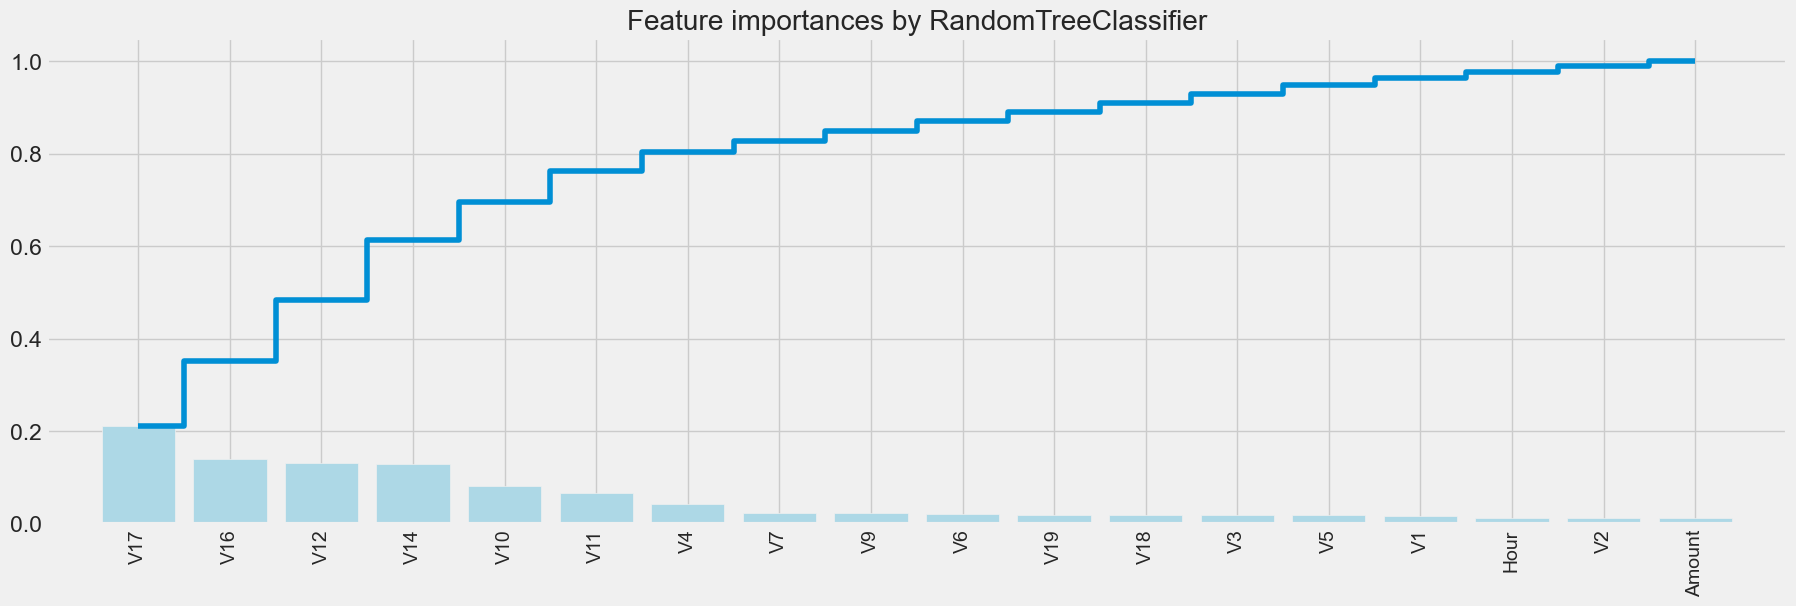

In [61]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

# 3 模型训练(Model Training)
## 3.1 处理样本不平衡
前面提到，目标列Class呈现较大的样本不平衡，会对模型学习造成困扰。样本不平衡常用的解决方法有过采样和欠采样，本项目处理样本不平衡采用的是过采样的方法，具体操作使用SMOTE（Synthetic Minority Oversampling Technique）。

In [63]:
# 构建自变量和因变量
X = data_cr[x_feature]
y = data_cr["Class"]

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：284807; 正样本占99.83%; 负样本占0.17%
特征维数： 18


In [73]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X, y = sm.fit_resample(X, y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample, n_pos_sample/n_sample,n_neg_sample/n_sample))

通过SMOTE方法平衡正负样本后
样本个数：568630; 正样本占50.00%; 负样本占50.00%


## 3.2 构建分类器进行训练

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf1 = LogisticRegression(max_iter=1000)  # 默认是100，换成1000或更高
clf1.fit(X_scaled, y)

LogisticRegression(max_iter=1000)

In [141]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.90153


Recall metric in the testing dataset:  0.8031690202768057


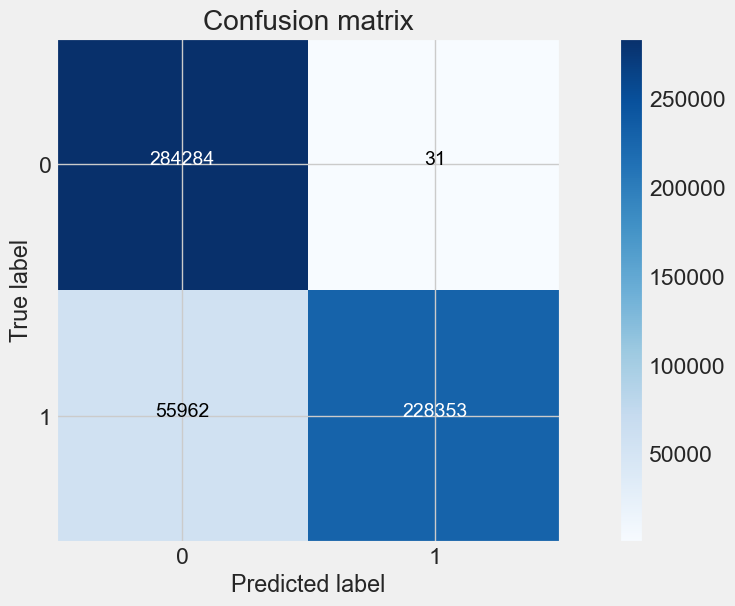

In [143]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predicted1)  # 生成混淆矩阵
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

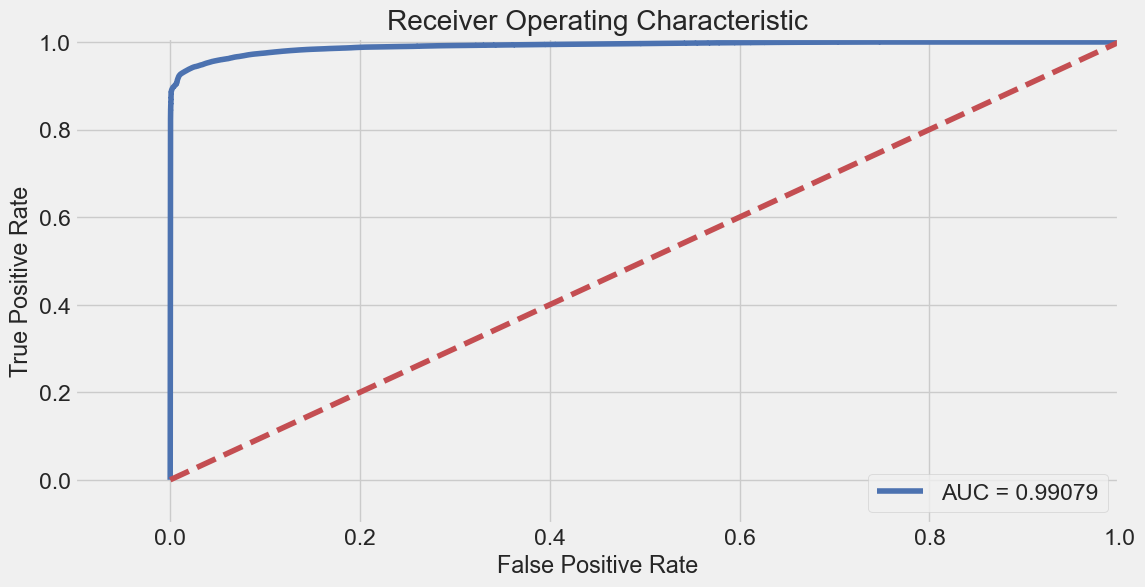

In [145]:
clf1 = LogisticRegression(max_iter=1000)  # 默认是100，太少了
clf1.fit(X, y)
y_pred1_prob = clf1.predict_proba(X)[:, 1]  # 阈值默认值为0.5

fpr, tpr, thresholds = roc_curve(y,y_pred1_prob)
roc_auc = auc(fpr,tpr)

# 绘制 ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.5f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4 模型评估与优化（Model Evaluation and Optimization）

本次项目采用的是交叉验证法划分数据集，将数据划分为3部分：训练集（training set）、验证集（validation set）和测试集（test set）。 让模型在训练集进行学习，在验证集上进行参数调优，最后使用测试集数据评估模型的性能。

模型调优我们采用网格搜索调优参数（grid search），通过构建参数候选集合，然后网格搜索会穷举各种参数组合，根据设定评定的评分机制找到最好的那一组设置。

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
# 参数组合
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 支持 l1 和 l2
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [155]:
results = pd.DataFrame(grid_search.cv_results_) 
best = np.argmax(results.mean_test_score.values)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.95818


In [157]:
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))

Test set accuracy score: 0.95860


In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     85172
           1       0.98      0.93      0.96     85417

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589



In [161]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.95818


Recall metric in the testing dataset:  0.9324607513726776


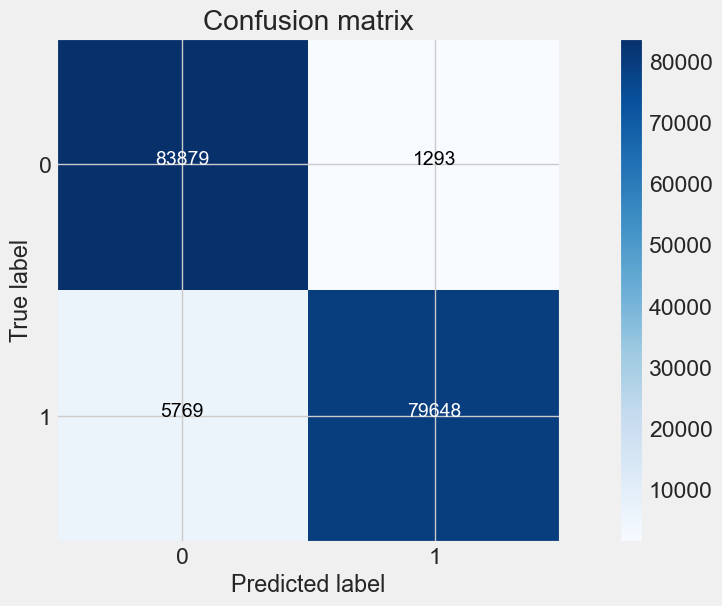

In [163]:
cnf_matrix = confusion_matrix(y_test, y_pred)  # 生成混淆矩阵
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

从上可以看出，经过交叉验证训练和参数调优后，模型的性能有较大的提升，recall值从0.80上升到0.93，上升幅度达到16.25%。

## 4.1 模型评估

Recall metric in the testing dataset:  0.9825561656344756
Recall metric in the testing dataset:  0.9675123219031341
Recall metric in the testing dataset:  0.9527026235995176
Recall metric in the testing dataset:  0.9420021775524778
Recall metric in the testing dataset:  0.9324607513726776
Recall metric in the testing dataset:  0.9262324829951883
Recall metric in the testing dataset:  0.9198637273610639
Recall metric in the testing dataset:  0.9119496119039535
Recall metric in the testing dataset:  0.8994345387920437


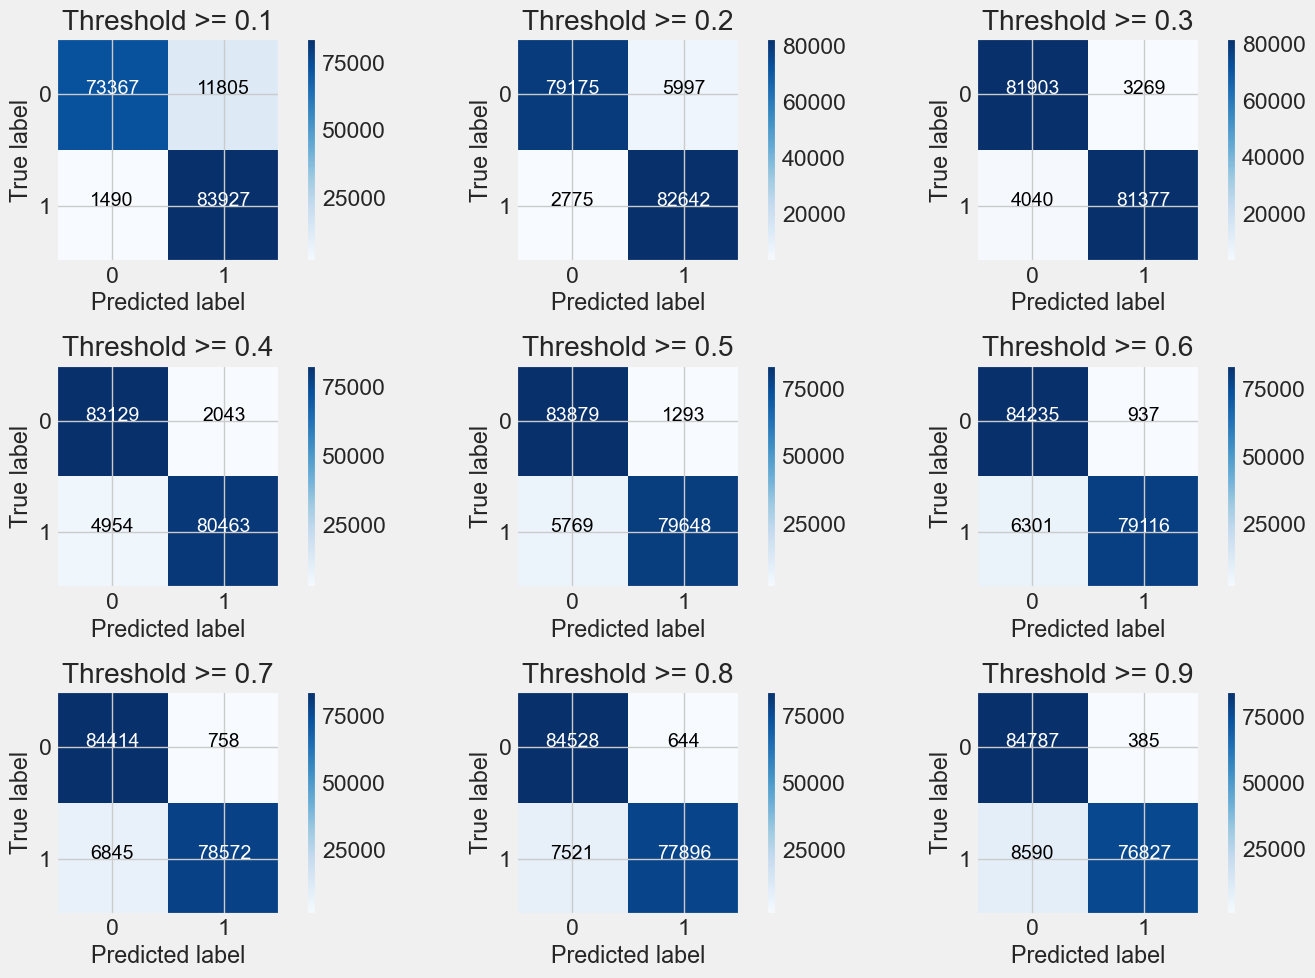

In [167]:
y_pred_proba = grid_search.predict_proba(X_test)  #predict_prob 获得一个概率值

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 设定不同阈值

plt.figure(figsize=(15,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i#预测出来的概率值是否大于阈值 
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i)



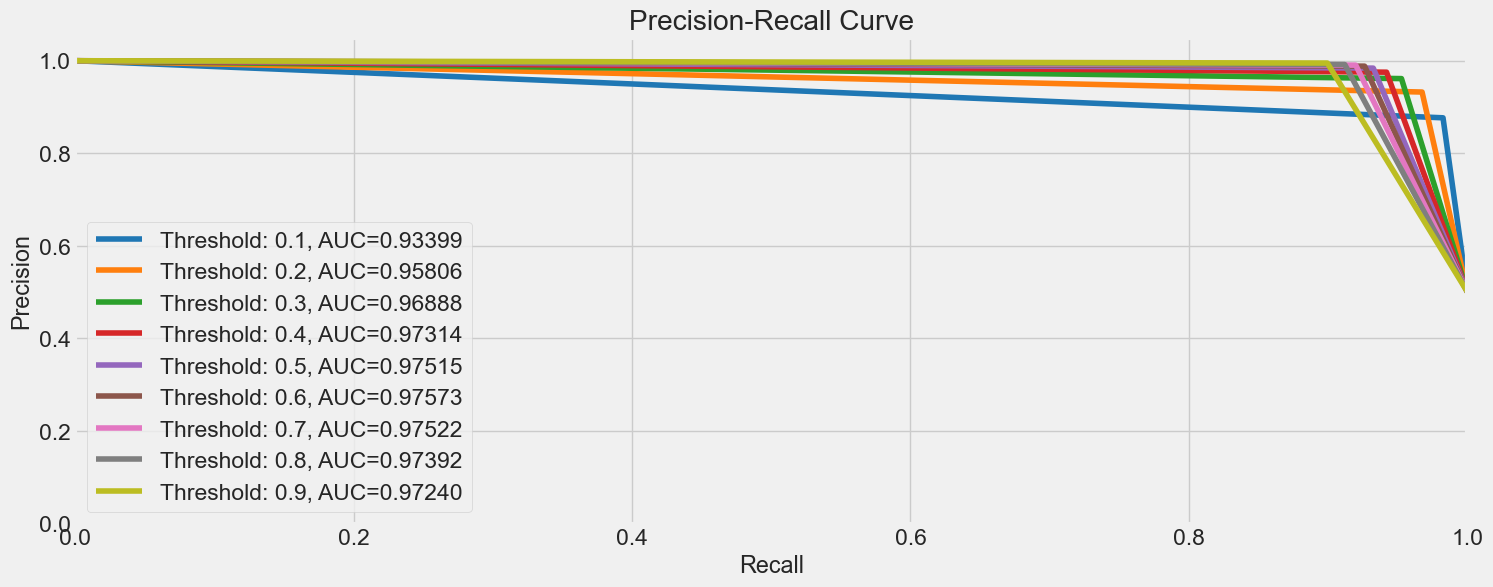

In [168]:
from itertools import cycle

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle([
    '#1f77b4',  # 柔和蓝
    '#ff7f0e',  # 橙黄
    '#2ca02c',  # 绿色
    '#d62728',  # 深红
    '#9467bd',  # 紫色
    '#8c564b',  # 棕色
    '#e377c2',  # 粉紫
    '#7f7f7f',  # 灰色
    '#bcbd22',  # 芥末绿
    '#17becf'   # 青色
])
plt.figure(figsize=(16,6))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i #预测出来的概率值是否大于阈值  

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predictions_prob)
    area = auc(recall, precision)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s, AUC=%0.5f' %(i , area))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

## 4.2 最优阈值
precision和recall是一组矛盾的变量。从上面混淆矩阵和PRC曲线可以看到，阈值越小，recall值越大，模型能找出信用卡被盗刷的数量也就更多，但换来的代价是误判的数量也较大。随着阈值的提高，recall值逐渐降低，precision值也逐渐提高，误判的数量也随之减少。通过调整模型阈值，控制模型反信用卡欺诈的力度，若想找出更多的信用卡被盗刷就设置较小的阈值，反之，则设置较大的阈值。

实际业务中，阈值的选择取决于公司业务边际利润和边际成本的比较；当模型阈值设置较小的值，确实能找出更多的信用卡被盗刷的持卡人，但随着误判数量增加，不仅加大了贷后团队的工作量，也会降低误判为信用卡被盗刷客户的消费体验，从而导致客户满意度下降，如果某个模型阈值能让业务的边际利润和边际成本达到平衡时，则该模型的阈值为最优值。当然也有例外的情况，发生金融危机，往往伴随着贷款违约或信用卡被盗刷的几率会增大，而金融机构会更愿意不惜一切代价守住风险的底线。